# Boosting - Adaboost
This code shows the implementation of Adaboost algorithm using Decision Trees as Black Box learners


## Imports
import the necessary libraries from sklearn, matplotlib and numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
warnings.filterwarnings('ignore')

## Function to create a mesh

In [2]:
def make_mesh(X):
    h =  0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    return xx,yy

Run inference on mesh

In [3]:
def run_mesh(xx,yy,clf):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

## Function for plotting Decision Regions
This function takes a classifier and the Dataset, then plots the decision regions and the data points of the dataset in those regions.

In [4]:
def Decision_Region(X,y,a,b,plt,clf=None,Z=None):
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    xx,yy = make_mesh(X)
    
    if Z==None:
        Z=run_mesh(xx,yy,clf)
        
    ax=plt.subplot(a,b,i+1)
    #illus_weights=8.* (sample_weight/np.min(sample_weight))**1.
    
    ax.scatter(X[:,0],X[:,1], cmap=cm_bright, c=y, edgecolors='black',lw=1.5,
               marker='o')
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8, vmin=0., vmax=1.)


    

## Initialize
Initialize the random seed and the number of samples to choose from the make_moons dataset

In [5]:
np.random.seed(100)
n_samples=100

Initialize the number of estimators

In [6]:
a=3
b=3
n_est=a*b

Initlialize the list of weak classifiers and their associated sample_weights and resultant_regions

In [7]:
weak_classifiers = []
weak_classifier_weights=np.zeros(n_est)
region_results_weak=[]
y_preds_weak=[]
sample_weights_weak=[]

Initlialize the list of strong classifier's predictions and its resultant_regions

In [8]:
y_preds_strong=[]
region_results_strong=[]

## Create the make_moons Dataset
Sample n_samples number of points from the dataset while adding some noise

In [9]:
X,y=make_moons(n_samples=n_samples, noise=0.25, random_state=2)

Initialization of sample weights

In [10]:
sample_weight = np.ones(y.shape)
sample_weight /= sample_weight.sum()

Parameters of the algorithm

In [11]:
gamma = 0.05
beta=(0.5-gamma)/(0.5+gamma)

Intermediate figures of weak and strong classifiers

In [12]:
weak_fig = plt.figure(figsize=(10, 8))
weak_fig.suptitle("Weak Classifiers")
strong_fig = plt.figure(figsize=(10, 8))
strong_fig.suptitle("Strong Classifier")

## Algorithm
This loop fits all the Decision Tree estimators on the make_moons samples, computes the respective losses, updates the parameters and sample weights.

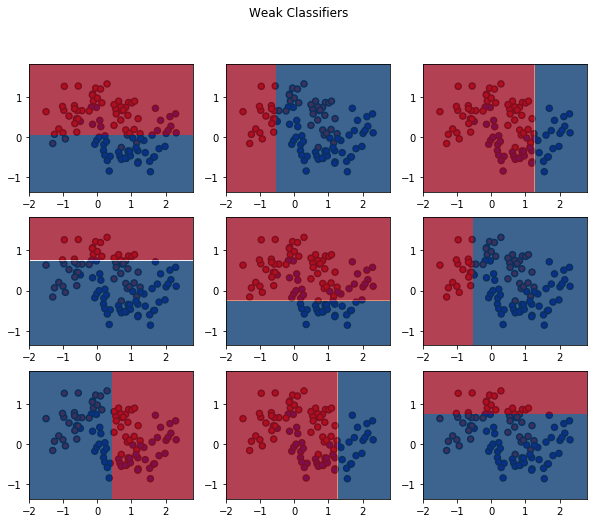

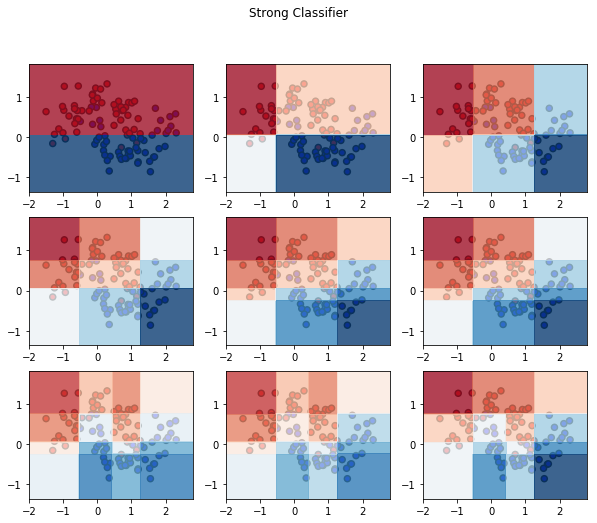

In [13]:

for i in range(n_est):
    
    '''
    Initializing the Decision Tree classifiers (weak classifiers) and 
    fitting them on the make_moons data
    '''
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X,y,sample_weight)

    '''
    Performing inference on the dataset, calculating losses
    and updating the parameters
    '''
    y_pred_current = clf.predict(X)
    losses_current = np.abs(y_pred_current-y)
    actual_gamma = 0.5 - np.sum(sample_weight*losses_current)/np.sum(sample_weight)
    actual_beta = (0.5-actual_gamma)/(0.5+actual_gamma)

    beta = actual_beta
    
    '''
    Plot Decision Region for the weak classifiers
    '''
    xx, yy = make_mesh(X)
    Z = run_mesh(xx,yy,clf)
    plt.figure(weak_fig.number, figsize=(10, 6))
    Decision_Region(X,y,a,b,plt,clf)
    
    '''
    Updating the sample weights
    '''
    sample_weights_weak.append(sample_weight)
    sample_weight =  sample_weight*(beta ** (-losses_current))
    sample_weight /= sample_weight.sum()

    '''
    Accumulating the weak classifiers, their weights, regions and predictions
    '''
    weak_classifiers.append(clf)
    weak_classifier_weights[i]=np.log(1/beta)
    region_results_weak.append(Z)
    y_preds_weak.append(y_pred_current)

    '''
    Updating the strong classifier using the predictions of the weak classifiers
    '''
    y_pred_strong=np.zeros(y.shape)
    region_result_strong=np.zeros(xx.shape)
    for j in range(i+1):
        y_pred_strong += weak_classifier_weights[j]*y_preds_weak[j]
        region_result_strong += weak_classifier_weights[j]*region_results_weak[j]
    y_pred_strong /= weak_classifier_weights[:i+1].sum()
    region_result_strong /= weak_classifier_weights[:i+1].sum()
    
    '''
    plotting the strong classifier
    '''
    plt.figure(strong_fig.number, figsize=(10, 6))
    Decision_Region(X,y,a,b,plt,Z=region_result_strong)
    y_preds_strong.append(y_pred_strong)
    region_results_strong.append(region_result_strong)
plt.show()  